# Unsupervised analysis
# 

In [2]:
#!pip install cytominer-eval
import os
import pandas as pd 
import numpy as np
import matplotlib  as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

%matplotlib inline
import os, shutil, glob
from PIL import Image
from random import randint
# import re, math
import seaborn as sns; sns.set_style("white")
# from sklearn.manifold import TSNE
import datetime
import gc
from pathlib import Path
from cytominer_eval import evaluate
import scanpy as sc 
from sklearn.decomposition import PCA
import polars as pl
import matplotlib as mpl
# 300 dpi
mpl.rcParams['figure.dpi'] = 300
# settings to display more columns and rows
pd.set_option("max_colwidth", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [5]:
df = pd.read_csv('/home/jovyan/share/data/analyses/sofia/morphomac/human_new_exp_files/work_df.csv', sep=',')

In [6]:
df

ImageID      Metadata_Barcode Metadata_Well  \
0     2024-W50-Macrophages_C03_3  2024-W50-Macrophages           C03   
1     2024-W50-Macrophages_C03_5  2024-W50-Macrophages           C03   
2     2024-W50-Macrophages_C03_6  2024-W50-Macrophages           C03   
3     2024-W50-Macrophages_C03_8  2024-W50-Macrophages           C03   
4     2024-W50-Macrophages_C03_9  2024-W50-Macrophages           C03   
...                          ...                   ...           ...   
2002  2024-W50-Macrophages_N21_9  2024-W50-Macrophages           N21   
2003  2024-W50-Macrophages_N22_2  2024-W50-Macrophages           N22   
2004  2024-W50-Macrophages_N22_3  2024-W50-Macrophages           N22   
2005  2024-W50-Macrophages_N22_6  2024-W50-Macrophages           N22   
2006  2024-W50-Macrophages_N22_9  2024-W50-Macrophages           N22   

      ImageNumber_nuclei  ObjectNumber_nuclei  Metadata_AcqID_x  \
0                    1.0                 79.0            5499.0   
1                    1.0                 52.0            5499.0   
2                    1.0                 57.5            5499.0   
3                    1.0                 40.5            5499.0   
4                    1.0                 54.0            5499.0   
...                  ...                  ...               ...   
2002                 1.0                 97.5            5499.0   
2003                 1.0                203.0            5499.0   
2004                 1.0                111.5            5499.0   
2005                 1.0                141.0            5499.0   
2006                 1.0                246.5            5499.0   

      Metadata_Site  AreaShape_Area_nuclei  AreaShape_BoundingBoxArea_nuclei  \
0                 3             599.847134                        846.668790   
1                 5             593.233010                        861.067961   
2                 6             599.070175                        844.570175   
3                 8             529.750000                        790.437500   
4                 9             588.495327                        881.102804   
...             ...                    ...                               ...   
2002              9             572.092784                        821.752577   
2003              2             661.441975                        904.945679   
2004              3             664.995495                        904.013514   
2005              6             632.092527                        873.046263   
2006              9             685.278455                        928.103659   

      AreaShape_BoundingBoxMaximum_X_nuclei  \
0                               1166.350318   
1                               1195.456311   
2                               1111.991228   
3                               1020.912500   
4                               1057.168224   
...                                     ...   
2002                            1131.582474   
2003                             886.283951   
2004                             900.301802   
2005                             798.014235   
2006                             960.398374   

      AreaShape_BoundingBoxMaximum_Y_nuclei  \
0                                990.757962   
1                               1155.349515   
2                               1023.929825   
3                               1110.850000   
4                                925.448598   
...                                     ...   
2002                             991.902062   
2003                            1042.725926   
2004                             975.837838   
2005                            1180.202847   
2006                            1078.680894   

      AreaShape_BoundingBoxMinimum_X_nuclei  \
0                               1137.872611   
1                               1166.592233   
2                               1083.149123   
3                                992.425000   
4                            

In [7]:
# Add ReplicateGroup and Replicate columns.
df['ReplicateGroup'] = df['Metadata_Contents'].astype(str) 
df['Replicate'] = df['ReplicateGroup'] + '_' + df['ImageID']

## Feature selection

In [8]:
# Select numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=np.number)
df_numeric

ImageNumber_nuclei  ObjectNumber_nuclei  Metadata_AcqID_x  \
0                    1.0                 79.0            5499.0   
1                    1.0                 52.0            5499.0   
2                    1.0                 57.5            5499.0   
3                    1.0                 40.5            5499.0   
4                    1.0                 54.0            5499.0   
...                  ...                  ...               ...   
2002                 1.0                 97.5            5499.0   
2003                 1.0                203.0            5499.0   
2004                 1.0                111.5            5499.0   
2005                 1.0                141.0            5499.0   
2006                 1.0                246.5            5499.0   

      Metadata_Site  AreaShape_Area_nuclei  AreaShape_BoundingBoxArea_nuclei  \
0                 3             599.847134                        846.668790   
1                 5             593.233010                        861.067961   
2                 6             599.070175                        844.570175   
3                 8             529.750000                        790.437500   
4                 9             588.495327                        881.102804   
...             ...                    ...                               ...   
2002              9             572.092784                        821.752577   
2003              2             661.441975                        904.945679   
2004              3             664.995495                        904.013514   
2005              6             632.092527                        873.046263   
2006              9             685.278455                        928.103659   

      AreaShape_BoundingBoxMaximum_X_nuclei  \
0                               1166.350318   
1                               1195.456311   
2                               1111.991228   
3                               1020.912500   
4                               1057.168224   
...                                     ...   
2002                            1131.582474   
2003                             886.283951   
2004                             900.301802   
2005                             798.014235   
2006                             960.398374   

      AreaShape_BoundingBoxMaximum_Y_nuclei  \
0                                990.757962   
1                               1155.349515   
2                               1023.929825   
3                               1110.850000   
4                                925.448598   
...                                     ...   
2002                             991.902062   
2003                            1042.725926   
2004                             975.837838   
2005                            1180.202847   
2006                            1078.680894   

      AreaShape_BoundingBoxMinimum_X_nuclei  \
0                               1137.872611   
1                               1166.592233   
2                               1083.149123   
3                                992.425000   
4                               1028.271028   
...                                     ...   
2002                            1103.159794   
2003                             855.849383   
2004                             870.567568   
2005                             768.683274   
2006                             929.898374   

      AreaShape_BoundingBoxMinimum_Y_nuclei  AreaShape_Center_X_nuclei  \
0                                961.745223                 1151.58450   
1                               1126.456311                 1180.41660   
2                                995.184211                 1096.98030   
3                               1084.250000                 1005.86360   
4                                895.551402                 1041.77970   
...                                     ...                        ...   
2002                       

In [9]:
print(f'Before removing columns =  {len(df_numeric.columns)}')

# Drop the features petter also drops
blocklist_features = (
    [col for col in df_numeric.columns if "Granularity_12" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Correlation_Manders" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Correlation_Manders" in col and "_cytoplasm" in col] +
    [col for col in df_numeric.columns if "Correlation_RWC" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Granularity_14" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Granularity_15" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Granularity_16" in col and "_nucleus" in col] +
    [col for col in df_numeric.columns if "Granularity_3" in col and "_cytoplasm" in col] +
    [col for col in df_numeric.columns if "Granularity_5" in col and "_cytoplasm" in col] +
    [col for col in df_numeric.columns if "Granularity_4" in col and "_cytoplasm" in col]
)

# Drop the selected columns --petter
df_numeric = df_numeric.drop(blocklist_features, axis=1)

feature_columns = [fc for fc in df_numeric.columns if ('Metadata' not in fc) &
                   ('Number' not in fc) & ('Outlier' not in fc) &
                   ('ImageQuality' not in fc) & ('concentration' not in fc) & ('Count' not in fc) & 
                   ('Total' not in fc) & ("cmpd_conc" not in fc) & ("ImageNumber_c" not in fc) & ("ObjectNumber_cells" not in fc)]

print(f'Excluded columns that are "Metadata", etc.: remaining {len(feature_columns)}')

# Subset the DataFrame to keep only feature columns
X = df_numeric.loc[:, feature_columns]

# Drop columns with missing values
X.dropna(axis=1, inplace=True)
print(f'Removed features with missing values: remaining {X.shape[1]}')

Before removing columns =  2142
Excluded columns that are "Metadata", etc.: remaining 2065
Removed features with missing values: remaining 2065


In [11]:
import pandas as pd

def drop_near_constant_features(df: pd.DataFrame, threshold: float = 0.10) -> pd.DataFrame:
    """
    Drop columns where the most common value accounts for more than `threshold` of the rows.
    
    Parameters:
    - df: Input Pandas DataFrame.
    - threshold: Proportion threshold to identify near-constant columns.
    
    Returns:
    - DataFrame with near-constant features removed.
    - List of dropped columns.
    """
    drop_columns = []
    
    for col in df.columns:
        # Get the most frequent value count
        most_common_count = df[col].value_counts().iloc[0]
        total_count = len(df)
        
        # Calculate the fraction of the most common value
        fraction = most_common_count / total_count
        
        # Check if it exceeds the threshold
        if fraction > threshold:
            drop_columns.append(col)
    
    print(f"Dropping {len(drop_columns)} near-constant columns: {drop_columns}")
    return df.drop(columns=drop_columns), drop_columns

    # Drop near-constant features
X, dropped_constant_cols = drop_near_constant_features(X, threshold=0.10)
print(f"Remaining features after dropping near-constant features: {X.shape[1]}")


Dropping 150 near-constant columns: ['Correlation_Manders_illumCONC_illumHOECHST_nuclei', 'Correlation_Manders_illumCONC_illumMITO_nuclei', 'Correlation_Manders_illumCONC_illumPHAandWGA_nuclei', 'Correlation_Manders_illumCONC_illumSYTO_nuclei', 'Correlation_Manders_illumHOECHST_illumMITO_nuclei', 'Correlation_Manders_illumHOECHST_illumPHAandWGA_nuclei', 'Correlation_Manders_illumMITO_illumHOECHST_nuclei', 'Correlation_Manders_illumMITO_illumPHAandWGA_nuclei', 'Correlation_Manders_illumPHAandWGA_illumHOECHST_nuclei', 'Correlation_Manders_illumPHAandWGA_illumMITO_nuclei', 'Correlation_Manders_illumSYTO_illumHOECHST_nuclei', 'Correlation_Manders_illumSYTO_illumMITO_nuclei', 'Correlation_Manders_illumSYTO_illumPHAandWGA_nuclei', 'Granularity_14_illumHOECHST_nuclei', 'Granularity_15_illumHOECHST_nuclei', 'Granularity_16_illumHOECHST_nuclei', 'Location_CenterMassIntensity_Z_illumCONC_nuclei', 'Location_CenterMassIntensity_Z_illumHOECHST_nuclei', 'Location_CenterMassIntensity_Z_illumMITO_nucl

In [12]:
def drop_low_variance_pandas(df: pd.DataFrame, columns=None, threshold: float=0.01) -> (pd.DataFrame, list):
    """
    Drops low-variance columns from a Pandas DataFrame.

    Parameters:
    - df: Pandas DataFrame.
    - columns: List of columns to check. If None, checks all columns.
    - threshold: Variance threshold below which columns are dropped.

    Returns:
    - A tuple containing:
        - The modified DataFrame.
        - A list of columns that were dropped.
    """
    if columns is None:
        columns = df.columns

    drop_columns = []

    for column in columns:
        # Calculate variance
        variance = df[column].var()
        if variance < threshold:
            drop_columns.append(column)

    # Drop the columns
    df = df.drop(columns=drop_columns)

    print(f"Dropped {len(drop_columns)} columns for low variance: {drop_columns}")
    return df, drop_columns

In [13]:
# Assuming X is your DataFrame
X_cleaned, dropped_columns = drop_low_variance_pandas(X, threshold=0.01)

print(f"Before dropping low-variance columns: {len(X.columns)}")
print(f"After dropping low-variance columns: {len(X_cleaned.columns)}")
print(f"Dropped columns: {dropped_columns}")

Dropped 1014 columns for low variance: ['AreaShape_Eccentricity_nuclei', 'AreaShape_Extent_nuclei', 'AreaShape_Solidity_nuclei', 'AreaShape_Zernike_1_1_nuclei', 'AreaShape_Zernike_2_0_nuclei', 'AreaShape_Zernike_2_2_nuclei', 'AreaShape_Zernike_3_1_nuclei', 'AreaShape_Zernike_3_3_nuclei', 'AreaShape_Zernike_4_0_nuclei', 'AreaShape_Zernike_4_2_nuclei', 'AreaShape_Zernike_4_4_nuclei', 'AreaShape_Zernike_5_1_nuclei', 'AreaShape_Zernike_5_3_nuclei', 'AreaShape_Zernike_5_5_nuclei', 'AreaShape_Zernike_6_0_nuclei', 'AreaShape_Zernike_6_2_nuclei', 'AreaShape_Zernike_6_4_nuclei', 'AreaShape_Zernike_6_6_nuclei', 'AreaShape_Zernike_7_1_nuclei', 'AreaShape_Zernike_7_3_nuclei', 'AreaShape_Zernike_7_5_nuclei', 'AreaShape_Zernike_7_7_nuclei', 'AreaShape_Zernike_8_0_nuclei', 'AreaShape_Zernike_8_2_nuclei', 'AreaShape_Zernike_8_4_nuclei', 'AreaShape_Zernike_8_6_nuclei', 'AreaShape_Zernike_8_8_nuclei', 'AreaShape_Zernike_9_1_nuclei', 'AreaShape_Zernike_9_3_nuclei', 'AreaShape_Zernike_9_5_nuclei', 'AreaSh

In [14]:
X_cleaned

AreaShape_Area_nuclei  AreaShape_BoundingBoxArea_nuclei  \
0                599.847134                        846.668790   
1                593.233010                        861.067961   
2                599.070175                        844.570175   
3                529.750000                        790.437500   
4                588.495327                        881.102804   
...                     ...                               ...   
2002             572.092784                        821.752577   
2003             661.441975                        904.945679   
2004             664.995495                        904.013514   
2005             632.092527                        873.046263   
2006             685.278455                        928.103659   

      AreaShape_BoundingBoxMaximum_X_nuclei  \
0                               1166.350318   
1                               1195.456311   
2                               1111.991228   
3                               1020.912500   
4                               1057.168224   
...                                     ...   
2002                            1131.582474   
2003                             886.283951   
2004                             900.301802   
2005                             798.014235   
2006                             960.398374   

      AreaShape_BoundingBoxMaximum_Y_nuclei  \
0                                990.757962   
1                               1155.349515   
2                               1023.929825   
3                               1110.850000   
4                                925.448598   
...                                     ...   
2002                             991.902062   
2003                            1042.725926   
2004                             975.837838   
2005                            1180.202847   
2006                            1078.680894   

      AreaShape_BoundingBoxMinimum_X_nuclei  \
0                               1137.872611   
1                               1166.592233   
2                               1083.149123   
3                                992.425000   
4                               1028.271028   
...                                     ...   
2002                            1103.159794   
2003                             855.849383   
2004                             870.567568   
2005                             768.683274   
2006                             929.898374   

      AreaShape_BoundingBoxMinimum_Y_nuclei  AreaShape_Center_X_nuclei  \
0                                961.745223                 1151.58450   
1                               1126.456311                 1180.41660   
2                                995.184211                 1096.98030   
3                               1084.250000                 1005.86360   
4                                895.551402                 1041.77970   
...                                     ...                        ...   
2002                             963.432990                 1116.87440   
2003                            1013.125926                  870.55646   
2004                             945.864865                  884.90890   
2005                            1150.722420                  782.80206   
2006                            1048.353659                  944.59906   

      AreaShape_Center_Y_nuclei  AreaShape_Compactness_nuclei  \
0                     975.79974                      1.221937   
1                    1140.30640                      1.312337   
2                    1008.99390                      1.205954   
3                    1096.89040                      1.305485   
4                     910.21910                      1.341904   
...                         ...                           ...   
2002                  977.06910                      1.272924   
2003                 1027.40210                      1.170530   
2004                  960.33200                      1.1

In [15]:
# Create a list of remaining varying features
varying_features = list(X_cleaned.columns)
print(len(varying_features))

901


In [19]:
df

ImageID      Metadata_Barcode Metadata_Well  \
0     2024-W50-Macrophages_C03_3  2024-W50-Macrophages           C03   
1     2024-W50-Macrophages_C03_5  2024-W50-Macrophages           C03   
2     2024-W50-Macrophages_C03_6  2024-W50-Macrophages           C03   
3     2024-W50-Macrophages_C03_8  2024-W50-Macrophages           C03   
4     2024-W50-Macrophages_C03_9  2024-W50-Macrophages           C03   
...                          ...                   ...           ...   
2002  2024-W50-Macrophages_N21_9  2024-W50-Macrophages           N21   
2003  2024-W50-Macrophages_N22_2  2024-W50-Macrophages           N22   
2004  2024-W50-Macrophages_N22_3  2024-W50-Macrophages           N22   
2005  2024-W50-Macrophages_N22_6  2024-W50-Macrophages           N22   
2006  2024-W50-Macrophages_N22_9  2024-W50-Macrophages           N22   

      ImageNumber_nuclei  ObjectNumber_nuclei  Metadata_AcqID_x  \
0                    1.0                 79.0            5499.0   
1                    1.0                 52.0            5499.0   
2                    1.0                 57.5            5499.0   
3                    1.0                 40.5            5499.0   
4                    1.0                 54.0            5499.0   
...                  ...                  ...               ...   
2002                 1.0                 97.5            5499.0   
2003                 1.0                203.0            5499.0   
2004                 1.0                111.5            5499.0   
2005                 1.0                141.0            5499.0   
2006                 1.0                246.5            5499.0   

      Metadata_Site  AreaShape_Area_nuclei  AreaShape_BoundingBoxArea_nuclei  \
0                 3             599.847134                        846.668790   
1                 5             593.233010                        861.067961   
2                 6             599.070175                        844.570175   
3                 8             529.750000                        790.437500   
4                 9             588.495327                        881.102804   
...             ...                    ...                               ...   
2002              9             572.092784                        821.752577   
2003              2             661.441975                        904.945679   
2004              3             664.995495                        904.013514   
2005              6             632.092527                        873.046263   
2006              9             685.278455                        928.103659   

      AreaShape_BoundingBoxMaximum_X_nuclei  \
0                               1166.350318   
1                               1195.456311   
2                               1111.991228   
3                               1020.912500   
4                               1057.168224   
...                                     ...   
2002                            1131.582474   
2003                             886.283951   
2004                             900.301802   
2005                             798.014235   
2006                             960.398374   

      AreaShape_BoundingBoxMaximum_Y_nuclei  \
0                                990.757962   
1                               1155.349515   
2                               1023.929825   
3                               1110.850000   
4                                925.448598   
...                                     ...   
2002                             991.902062   
2003                            1042.725926   
2004                             975.837838   
2005                            1180.202847   
2006                            1078.680894   

      AreaShape_BoundingBoxMinimum_X_nuclei  \
0                               1137.872611   
1                               1166.592233   
2                               1083.149123   
3                                992.425000   
4                            

In [20]:
df.ReplicateGroup.unique()

array(['CL264_IFNg', 'LTA_NoIFN', 'Medium_IFNb', 'LPS_IFNg',
       'IL4+IL13_IFNb', 'LPS_IFNb', 'Pam3CSK_IFNg', 'Medium_NoIFN',
       'CpG_IFNg', 'Medium_IFNg', 'Flagellin_NoIFN', 'CpG_IFNb',
       'Pam3CSK_IFNb', 'LTA_IFNg', 'Flagellin_IFNb', 'Poly(IC)_IFNg',
       'Pam3CSK_NoIFN', 'IL4+IL13_IFNg', 'Flagellin_IFNg', 'LPS_NoIFN',
       'CL264_NoIFN', 'CpG_NoIFN', 'Poly(IC)_IFNb', 'LTA_IFNb',
       'CL264_IFNb', 'IL4+IL13_NoIFN', 'Poly(IC)_NoIFN'], dtype=object)

In [21]:
# Copy the sites DataFrame
df = df.copy()

# Assuming the first 7 and the last 14 columns are metadata
metadata_columns = list(df.columns[:7]) + list(df.columns[-23:])

features_columns = varying_features
dfDMSO = df[df['ReplicateGroup'] == 'Medium_NoIFN']  # Calculate median values for DMSO

# If you need to print the lists
print("Metadata columns list:", metadata_columns)
print("Features columns list:", features_columns)
print("Number of features :", len(features_columns))

Metadata columns list: ['ImageID', 'Metadata_Barcode', 'Metadata_Well', 'ImageNumber_nuclei', 'ObjectNumber_nuclei', 'Metadata_AcqID_x', 'Metadata_Site', 'plateWell', 'Metadata_Species', 'Metadata_PlateWell', 'Metadata_Ligand', 'Metadata_Interferon', 'Metadata_Contents', 'Metadata_AcqID_y', 'Count_nuclei', 'ImageQuality_FocusScore_CONC', 'ImageQuality_FocusScore_HOECHST', 'ImageQuality_FocusScore_MITO', 'ImageQuality_FocusScore_PHAandWGA', 'ImageQuality_FocusScore_SYTO', 'OutlierScaled_FocusScore_-4.5_4.5', 'Outlier_FocusScore_0_0.1', 'OutlierScaled_FocusScore_-4.5_4.5.1', 'OutlierScaled_MaxIntensity_-4.5_4.5', 'OutlierScaled_MeanIntensity_-4.5_4.5', 'OutlierScaled_PowerLogLogSlope_-4.5_4.5', 'OutlierScaled_StdIntensity_-4.5_4.5', 'Total', 'ReplicateGroup', 'Replicate']
Features columns list: ['AreaShape_Area_nuclei', 'AreaShape_BoundingBoxArea_nuclei', 'AreaShape_BoundingBoxMaximum_X_nuclei', 'AreaShape_BoundingBoxMaximum_Y_nuclei', 'AreaShape_BoundingBoxMinimum_X_nuclei', 'AreaShape_

In [34]:
import pandas as pd
import numpy as np

# Function to compute MAD for a DataFrame
def compute_mad(df):
    """Compute Median Absolute Deviation for each column in a DataFrame."""
    return df.apply(lambda x: np.median(np.abs(x - np.median(x))), axis=0)

# Function to apply MAD-based standardization
def mad_transform(df, medians, mads):
    """Perform MAD scaling on the DataFrame."""
    return (df - medians) / mads

# Step 1: Filter Globally Invariant Features
# Select DMSO data for global filtering
dfDMSO = df[df['ReplicateGroup'] == 'Medium_NoIFN']

# Calculate global MADs and medians for DMSO data
global_medians = dfDMSO[features_columns].median()
global_mads = compute_mad(dfDMSO[features_columns])

# Define a threshold for invariant features
mad_threshold = 0.001
globally_varying_features = global_mads[global_mads > mad_threshold].index

print(f"Number of globally varying features: {len(globally_varying_features)}")

# Step 2: Plate-Specific Standardization
# Initialize an empty DataFrame to store MAD-scaled features
df_features_MADscaled = pd.DataFrame()

# Iterate over each unique plate
for plate, df_plate in df.groupby('Metadata_Barcode'):
    print(f"Processing plate: {plate}")

    # Filter the data for the globally varying features
    df_plate_filtered = df_plate[globally_varying_features]

    # Select DMSO data for the current plate
    df_dmso_plate = df_plate[df_plate['ReplicateGroup'] == 'Medium_NoIFN']

    # Calculate plate-specific medians and MADs for DMSO data
    plate_medians = df_dmso_plate[globally_varying_features].median()
    plate_mads = compute_mad(df_dmso_plate[globally_varying_features])

    # Avoid division by zero in case MAD = 0
    plate_mads[plate_mads == 0] = 1e-9

    # Apply MAD transformation to the feature columns for this plate
    df_plate_scaled = df_plate.copy()  # Copy to retain metadata
    df_plate_scaled[globally_varying_features] = mad_transform(
        df_plate_filtered, plate_medians, plate_mads
    )

    # Append the transformed data to the final DataFrame
    df_features_MADscaled = pd.concat([df_features_MADscaled, df_plate_scaled])

# Reset index if needed
df_features_MADscaled.reset_index(drop=True, inplace=True)

# Step 3: Verify Standardization
# Check that medians are close to 0 for DMSO data across all plates
for barcode in df_features_MADscaled.Metadata_Barcode.unique():
    plate_df = df_features_MADscaled[df_features_MADscaled.Metadata_Barcode == barcode]
    dmso_df = plate_df[plate_df.ReplicateGroup == 'Medium_NoIFN'][globally_varying_features]
    print(f"Median values for DMSO in plate {barcode} (should be close to 0):")
    print(dmso_df.median())

# Step 4: Separate Metadata and Feature Data
metadata_df = df_features_MADscaled[metadata_columns]
feature_data_df = df_features_MADscaled[globally_varying_features]

# Ensure metadata and feature data indices match
if not feature_data_df.index.equals(metadata_df.index):
    raise ValueError("The indices of feature data and metadata do not match.")

Number of globally varying features: 900
Processing plate: 2024-W50-Macrophages
Median values for DMSO in plate 2024-W50-Macrophages (should be close to 0):
AreaShape_Area_nuclei                                      0.0
AreaShape_BoundingBoxArea_nuclei                           0.0
AreaShape_BoundingBoxMaximum_X_nuclei                      0.0
AreaShape_BoundingBoxMaximum_Y_nuclei                      0.0
AreaShape_BoundingBoxMinimum_X_nuclei                      0.0
                                                          ... 
RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm    0.0
RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm    0.0
RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm    0.0
RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm    0.0
RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm    0.0
Length: 900, dtype: float64


In [26]:
# Step 4: Separate Metadata and Feature Data
metadata_df_C = df_features_MADscaled[metadata_columns]
feature_data_df_C = df_features_MADscaled[globally_varying_features]

In [28]:
df_features_MADscaled.ReplicateGroup.value_counts()

ReplicateGroup
Medium_NoIFN       283
Flagellin_NoIFN     72
Poly(IC)_NoIFN      71
Poly(IC)_IFNb       71
Pam3CSK_IFNg        70
CpG_IFNg            70
IL4+IL13_NoIFN      70
Poly(IC)_IFNg       70
CpG_IFNb            70
LPS_IFNg            70
LTA_NoIFN           69
Medium_IFNb         69
Pam3CSK_IFNb        69
CL264_NoIFN         68
Medium_IFNg         68
CL264_IFNb          68
LTA_IFNg            67
CpG_NoIFN           67
LPS_IFNb            65
Pam3CSK_NoIFN       65
CL264_IFNg          64
IL4+IL13_IFNg       64
Flagellin_IFNg      62
LTA_IFNb            59
Flagellin_IFNb      57
LPS_NoIFN           56
IL4+IL13_IFNb       53
Name: count, dtype: int64

In [29]:
# Create AnnData object for UMAP
standarized = sc.AnnData(X=feature_data_df_C, obs=metadata_df_C)

# Perform PCA and UMAP
sc.tl.pca(standarized, svd_solver='arpack')
sc.pp.neighbors(standarized, n_neighbors=10, use_rep='X')
sc.tl.umap(standarized)


/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


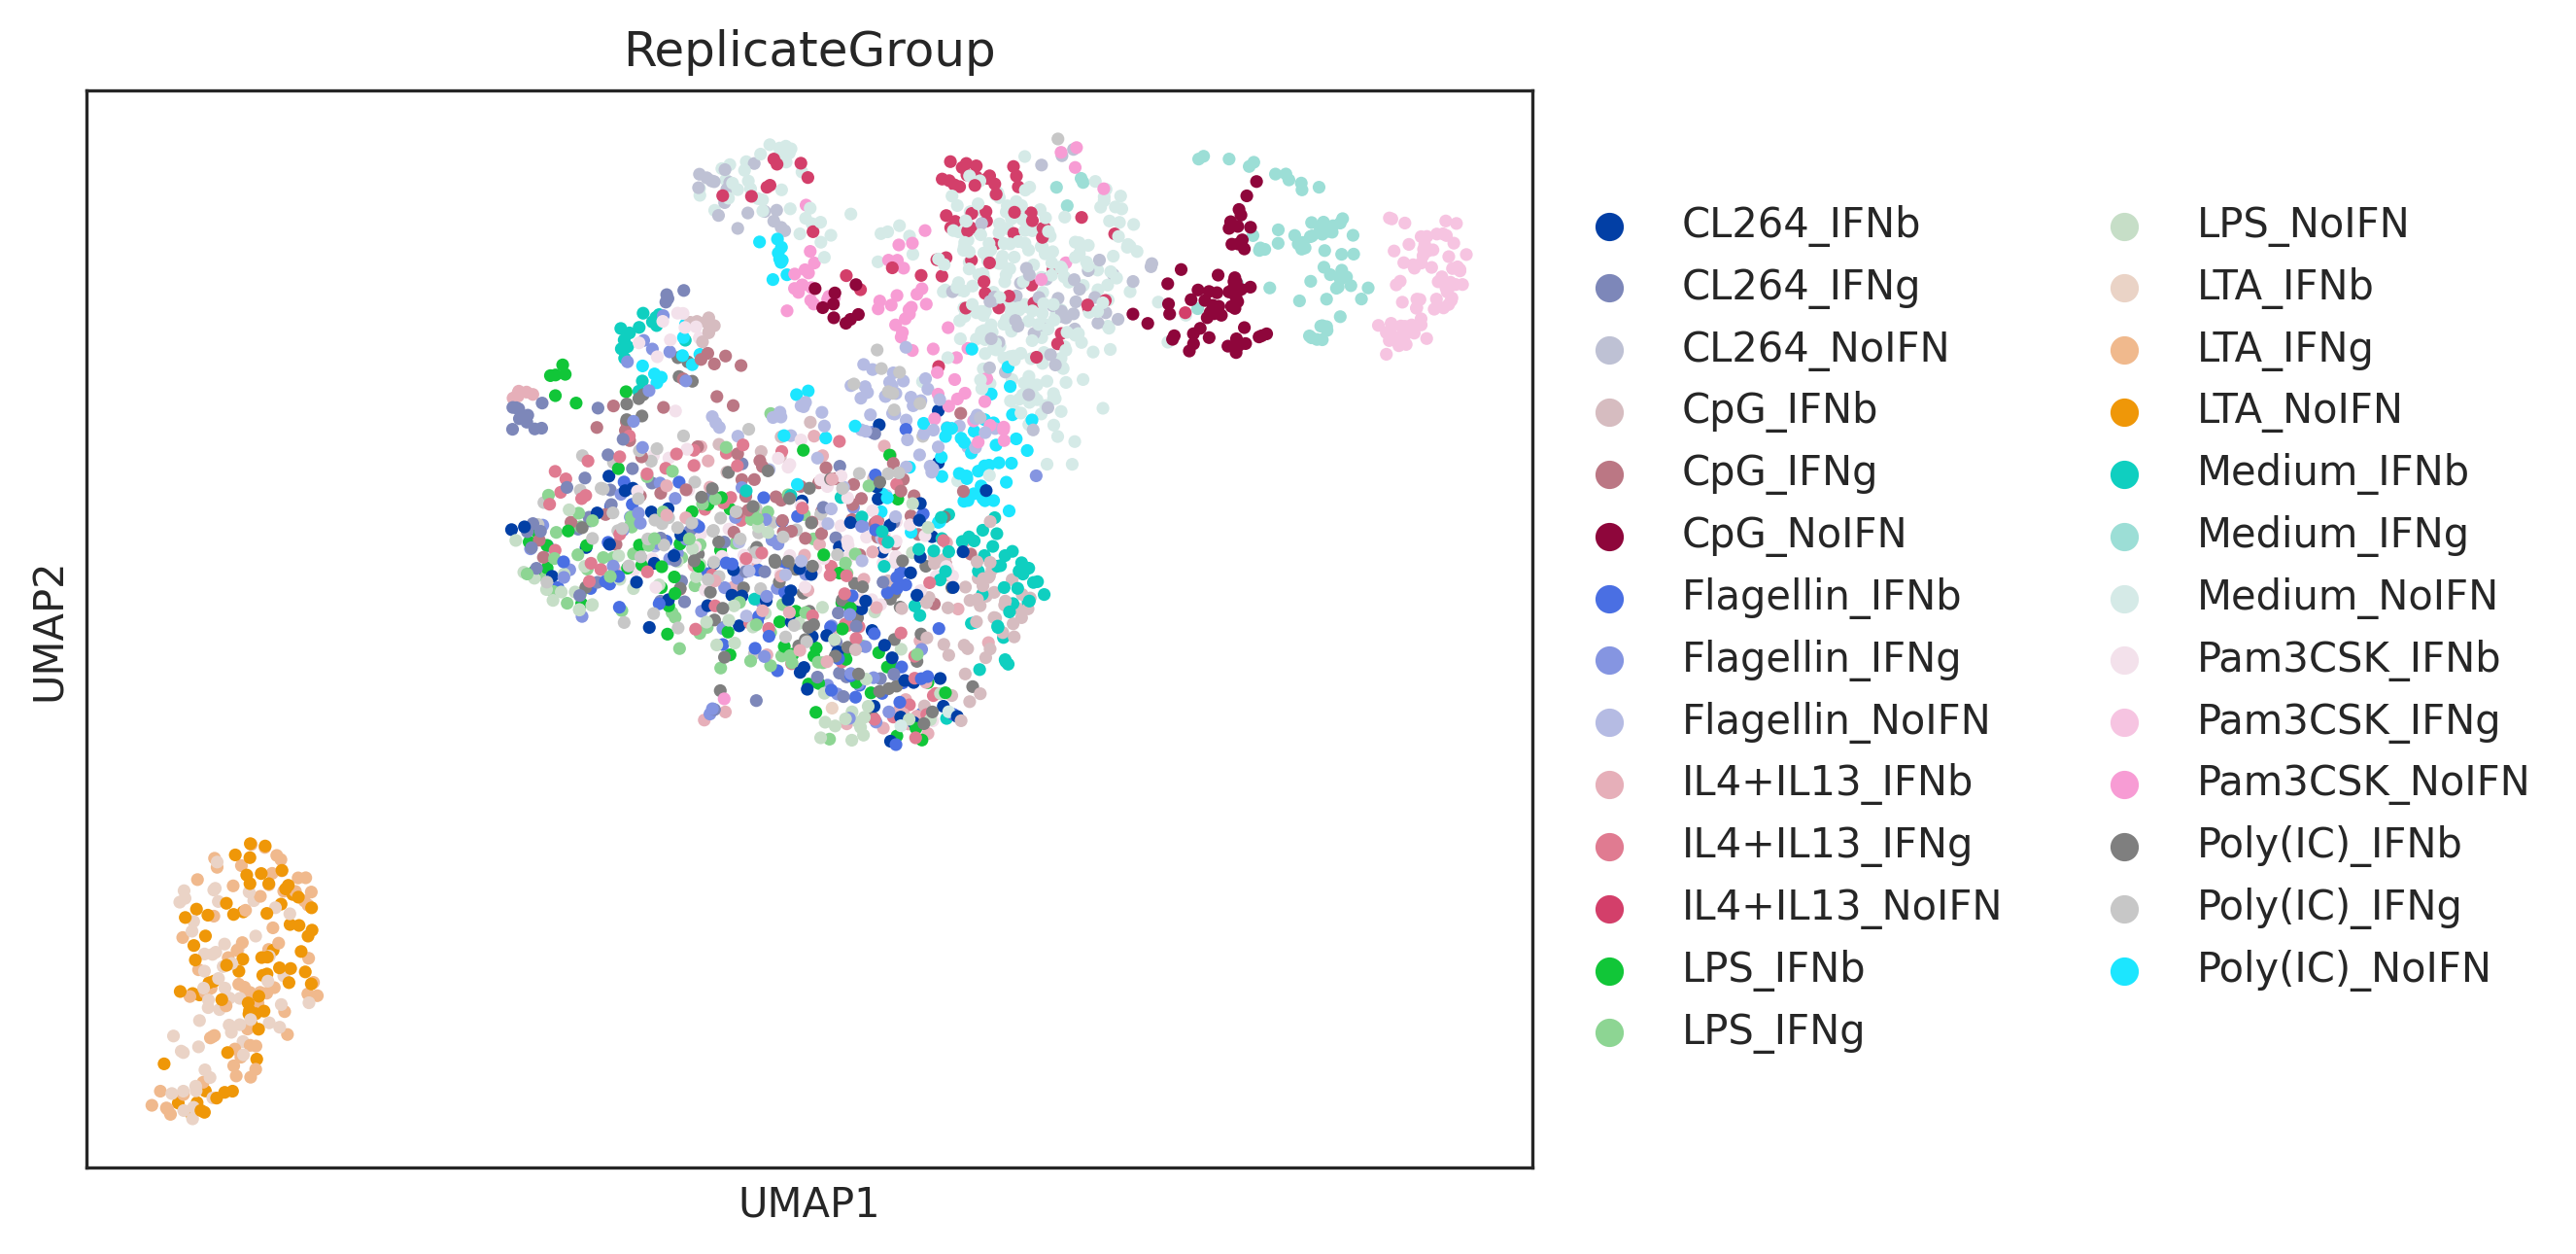

In [31]:
# Plot UMAP
sc.pl.umap(standarized, color='ReplicateGroup', size=40)  # Adjust 'compound_id' to the metadata column of interest

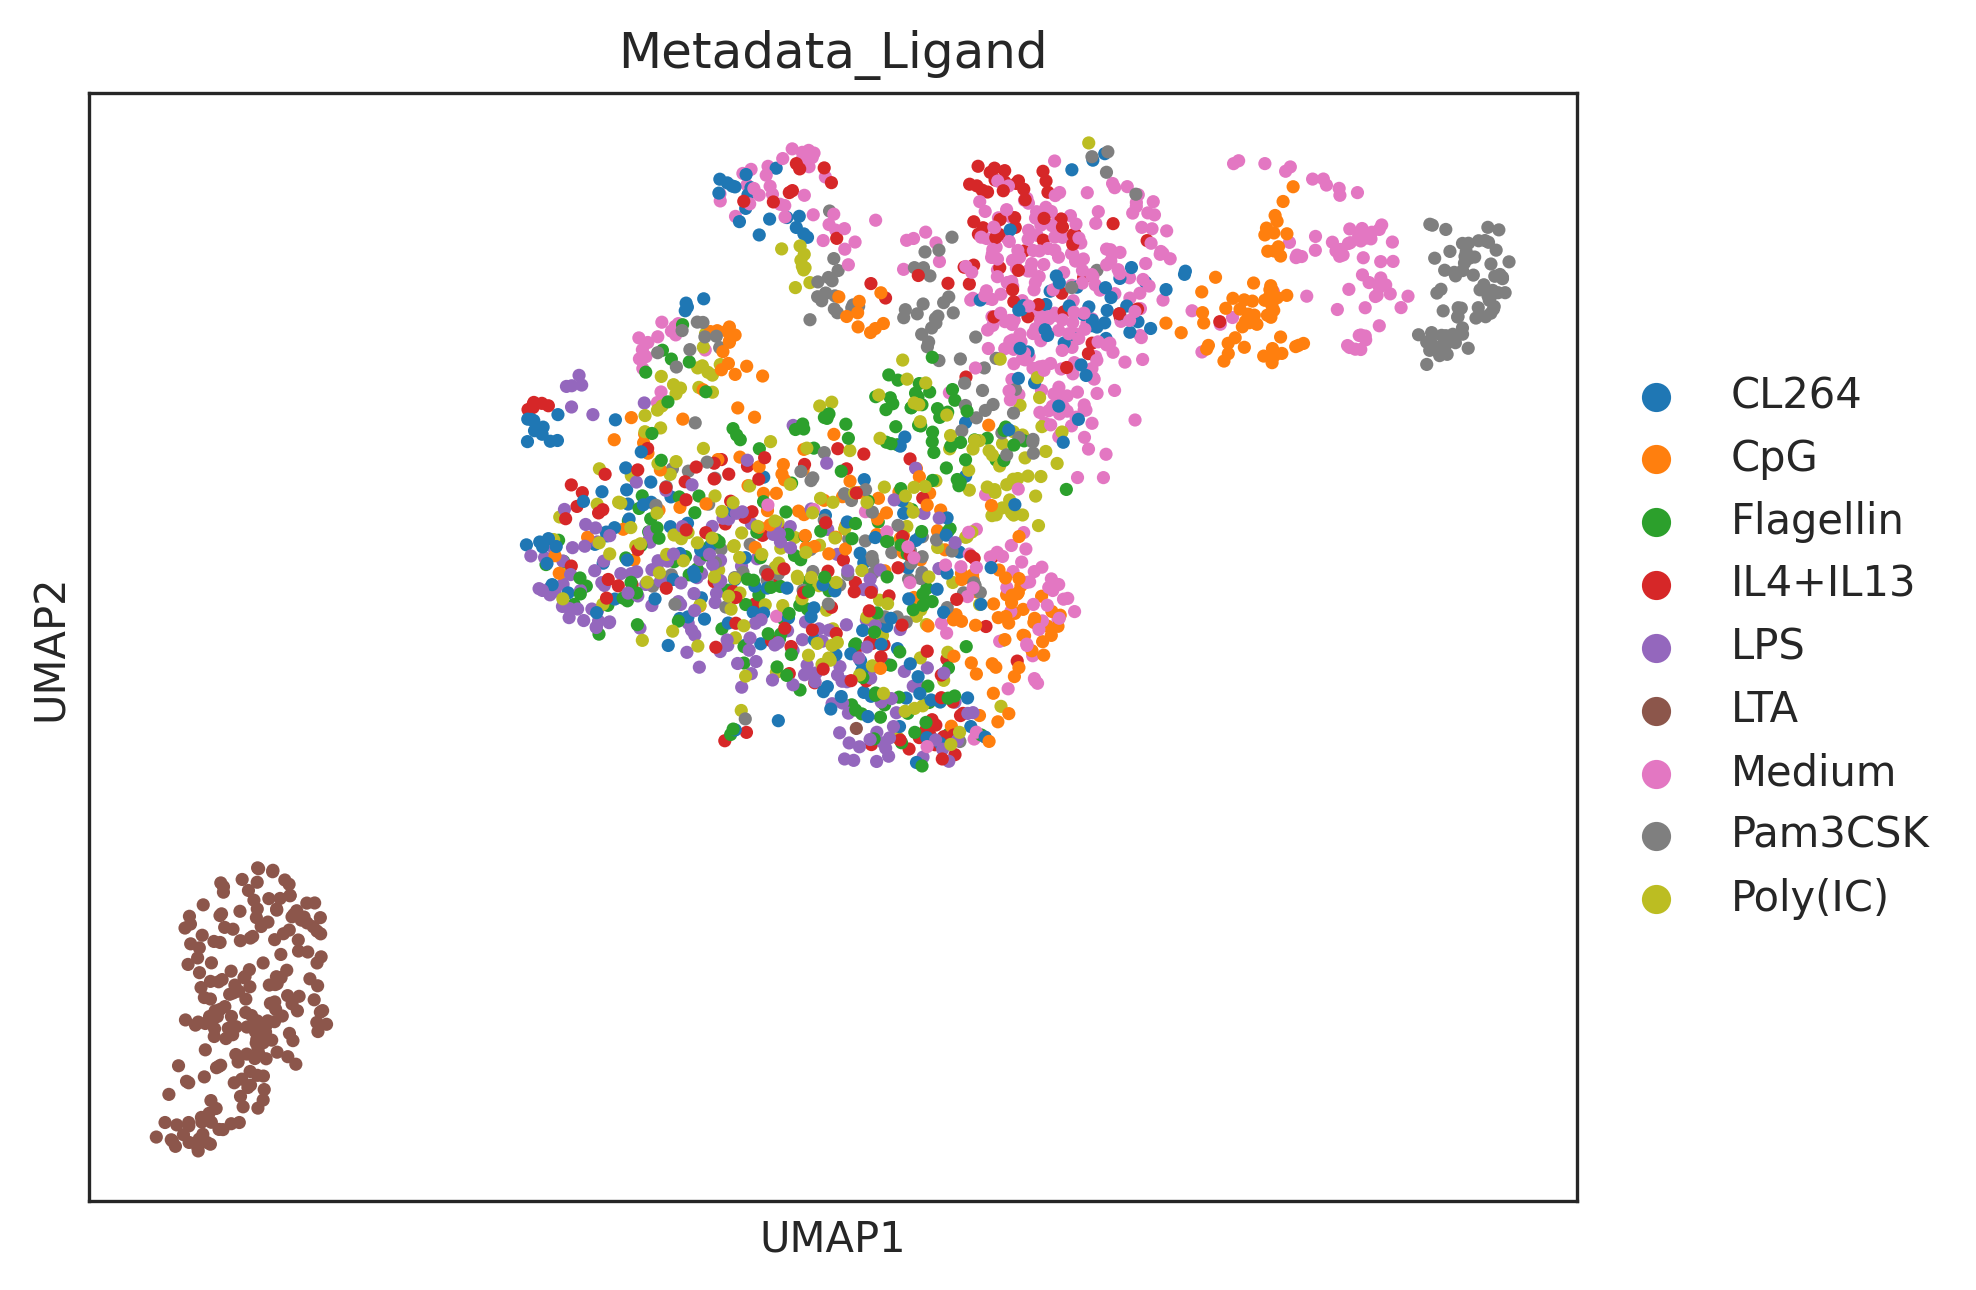

In [32]:
sc.pl.umap(standarized, color='Metadata_Ligand', size=40)  # Adjust 'compound_id' to the metadata column of interest

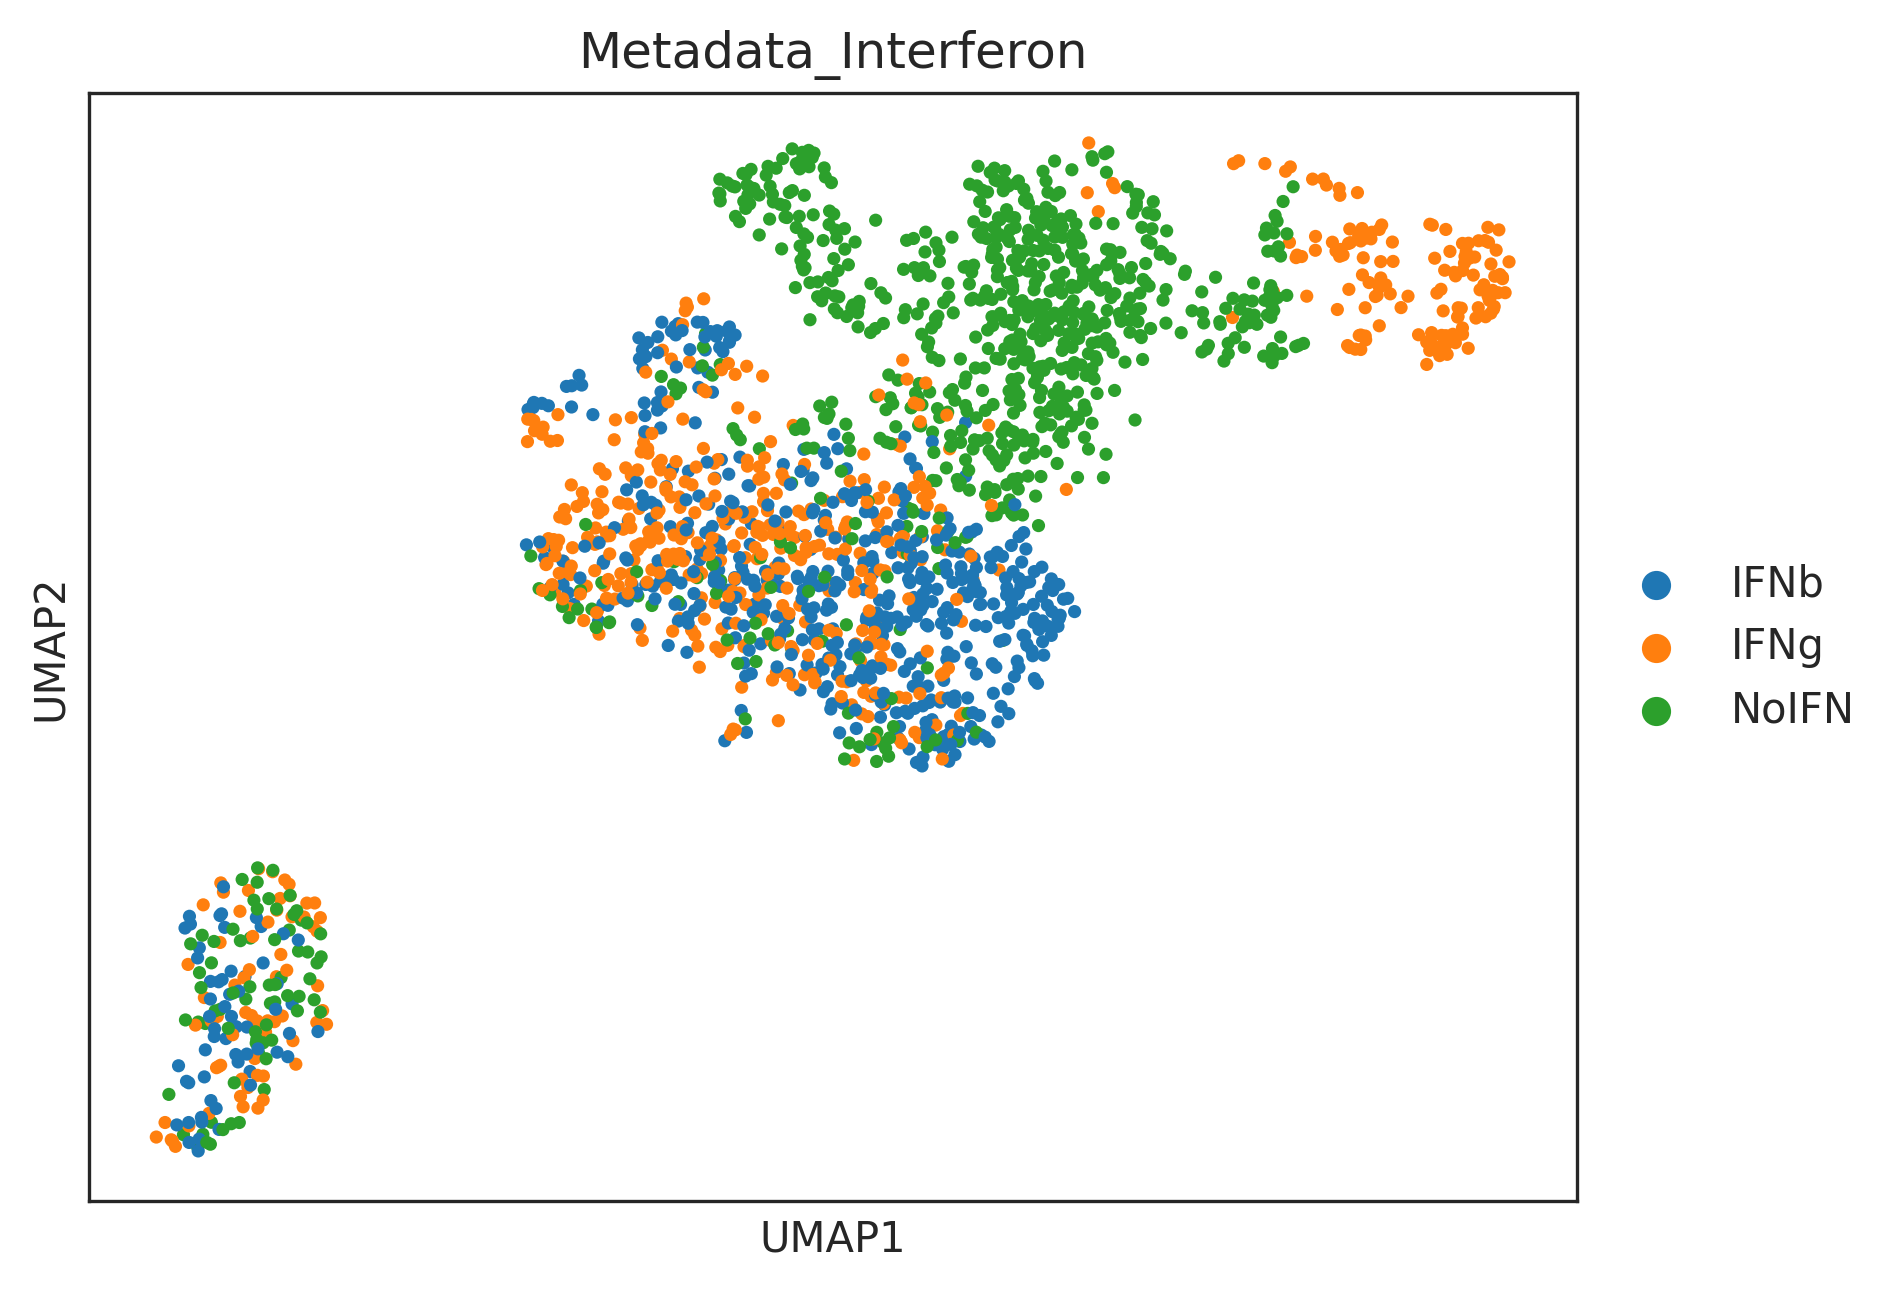

In [33]:
sc.pl.umap(standarized, color='Metadata_Interferon', size=40)  # Adjust 'compound_id' to the metadata column of interest

In [36]:

sc.tl.embedding_density(standarized,basis="umap",groupby='ReplicateGroup')
sc.pl.embedding_density(standarized,basis="umap",groupby='ReplicateGroup')

## grit

In [37]:
control_perts = df_features_MADscaled.query("ReplicateGroup == 'Medium_NoIFN'").Replicate.unique().tolist() # This makes a list of wells that contain DMSO
print(len(control_perts))
grit_replicate_groups = {
    "profile_col": "Replicate", 
     "replicate_group_col": "ReplicateGroup" 
}

283


In [38]:
globally_varying_features

Index(['AreaShape_Area_nuclei', 'AreaShape_BoundingBoxArea_nuclei',
       'AreaShape_BoundingBoxMaximum_X_nuclei',
       'AreaShape_BoundingBoxMaximum_Y_nuclei',
       'AreaShape_BoundingBoxMinimum_X_nuclei',
       'AreaShape_BoundingBoxMinimum_Y_nuclei', 'AreaShape_Center_X_nuclei',
       'AreaShape_Center_Y_nuclei', 'AreaShape_Compactness_nuclei',
       'AreaShape_ConvexArea_nuclei',
       ...
       'RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_8_0_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm',
       'RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm',


In [40]:
grit_scores = []

for one_plate in df_features_MADscaled.Metadata_Barcode.unique():
    one_plate_df = df_features_MADscaled.query("Metadata_Barcode == @one_plate")
    
    grit_results = evaluate(
        profiles=one_plate_df,
        features=globally_varying_features,
        meta_features=metadata_columns,
        replicate_groups=grit_replicate_groups,
        operation="grit",
        similarity_metric="pearson",
        grit_replicate_summary_method="mean", # median
        grit_control_perts=control_perts
        ).assign(one_plate=one_plate)
    grit_results = grit_results.merge(one_plate_df[['Replicate' ]], left_on = 'perturbation', right_on = 'Replicate')
    grit_scores.append(grit_results)

In [45]:
OutputDir = '/home/jovyan/share/data/analyses/sofia/morphomac/human_new_exp_files/unsupervised'
Cellline='new_exp'
grit_scores_df = pd.concat(grit_scores).reset_index(drop=True)
# #print("Before", grit_scores_df.shape)
grit_scores_df['ligand'] = grit_scores_df.perturbation.str.split('_').str[0]
grit_scores_df['interferon'] = grit_scores_df.perturbation.str.split('_').str[1].astype(str)
grit_scores_df.to_csv('{}/GritScores_clipped_new{}.csv'.format(OutputDir, Cellline), sep=';')
# #print("After", grit_scores_df.shape)
# #grit_scores.head()
grit_scores_df.head(9)

perturbation       group      grit  \
0  CL264_IFNb_2024-W50-Macrophages_E17_1  CL264_IFNb  2.070574   
1  CL264_IFNb_2024-W50-Macrophages_E17_2  CL264_IFNb  2.617192   
2  CL264_IFNb_2024-W50-Macrophages_E17_3  CL264_IFNb  3.266861   
3  CL264_IFNb_2024-W50-Macrophages_E17_4  CL264_IFNb  2.094571   
4  CL264_IFNb_2024-W50-Macrophages_E17_5  CL264_IFNb  3.277194   
5  CL264_IFNb_2024-W50-Macrophages_E17_6  CL264_IFNb  3.232656   
6  CL264_IFNb_2024-W50-Macrophages_E17_7  CL264_IFNb  2.690188   
7  CL264_IFNb_2024-W50-Macrophages_E17_8  CL264_IFNb  2.959086   
8  CL264_IFNb_2024-W50-Macrophages_E17_9  CL264_IFNb  2.958325   

              one_plate                              Replicate ligand  \
0  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_1  CL264   
1  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_2  CL264   
2  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_3  CL264   
3  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_4  CL264   
4  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_5  CL264   
5  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_6  CL264   
6  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_7  CL264   
7  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_8  CL264   
8  2024-W50-Macrophages  CL264_IFNb_2024-W50-Macrophages_E17_9  CL264   

  interferon  
0       IFNb  
1       IFNb  
2       IFNb  
3       IFNb  
4       IFNb  
5       IFNb  
6       IFNb  
7       IFNb  
8       IFNb

In [47]:
grit_scores_grouped = grit_scores_df.groupby('group').mean(numeric_only=True).reset_index()
# Split 'group' column to get 'compound' and 'dose'
grit_scores_grouped[['compound', 'dose']] = grit_scores_grouped['group'].str.split('_', expand=True)

# Convert 'dose' column to float
grit_scores_grouped['dose'] = grit_scores_grouped['dose'].astype(str)
#grit_scores_grouped['compound'] = grit_scores_grouped.index.str.split('_').str[0]
# grit_scores_grouped['doses'] = grit_scores_grouped.index.str.split('_').str[1].astype(float)

grit_scores_grouped.sort_values(by=['compound','dose'], inplace=True)
grit_scores_grouped.to_csv('{}/GritScoresGrouped_clipped_new{}.csv'.format(OutputDir, Cellline), sep=';')


In [48]:
grit_scores_grouped

group          grit   compound   dose
0        CL264_IFNb  2.914212e+00      CL264   IFNb
1        CL264_IFNg  2.708027e+00      CL264   IFNg
2       CL264_NoIFN  2.742513e-01      CL264  NoIFN
3          CpG_IFNb  2.749846e+00        CpG   IFNb
4          CpG_IFNg  3.102942e+00        CpG   IFNg
5         CpG_NoIFN  1.980763e+00        CpG  NoIFN
6    Flagellin_IFNb  3.016119e+00  Flagellin   IFNb
7    Flagellin_IFNg  2.946577e+00  Flagellin   IFNg
8   Flagellin_NoIFN  2.031893e+00  Flagellin  NoIFN
9     IL4+IL13_IFNb  2.659942e+00   IL4+IL13   IFNb
10    IL4+IL13_IFNg  2.772732e+00   IL4+IL13   IFNg
11   IL4+IL13_NoIFN  7.473392e-01   IL4+IL13  NoIFN
12         LPS_IFNb  2.586358e+00        LPS   IFNb
13         LPS_IFNg  3.198795e+00        LPS   IFNg
14        LPS_NoIFN  2.594158e+00        LPS  NoIFN
15         LTA_IFNb  1.060374e+01        LTA   IFNb
16         LTA_IFNg  1.132455e+01        LTA   IFNg
17        LTA_NoIFN  1.122467e+01        LTA  NoIFN
18      Medium_IFNb  2.859595e+00     Medium   IFNb
19      Medium_IFNg  2.504986e+00     Medium   IFNg
20     Medium_NoIFN  5.815017e-19     Medium  NoIFN
21     Pam3CSK_IFNb  3.393065e+00    Pam3CSK   IFNb
22     Pam3CSK_IFNg  3.669816e+00    Pam3CSK   IFNg
23    Pam3CSK_NoIFN  1.045977e+00    Pam3CSK  NoIFN
24    Poly(IC)_IFNb  3.201235e+00   Poly(IC)   IFNb
25    Poly(IC)_IFNg  3.262862e+00   Poly(IC)   IFNg
26   Poly(IC)_NoIFN  1.673285e+00   Poly(IC)  NoIFN

In [50]:
# Ensure the grits column contains only numeric values
grits = grit_scores_grouped['grit'].apply(pd.to_numeric, errors='coerce')  # Replace 'grit' with your column name if different

# Drop NaN values that may have been introduced during conversion
grits = grits.dropna()

# Convert to a NumPy array and sort
grits = np.sort(grits)

print("Number of unique grit scores:", len(grits))
grit_below_1 = (grits < 0.99).sum()
print("Number of grits scores below 0.99:", grit_below_1)

# Filter DataFrames based on grit scores
df_grit_1 = grit_scores_grouped[grit_scores_grouped['grit'] >= 0.99].sort_values(by=['grit'])
print("Number of grit scores higher than 0.99:", len(df_grit_1))

df_grit_1_5 = grit_scores_grouped[grit_scores_grouped['grit'] >= 1.5].sort_values(by=['grit'])
print("Number of grit scores higher than 1.5:", len(df_grit_1_5))

df_grit_4 = grit_scores_grouped[grit_scores_grouped['grit'] >= 4].sort_values(by=['grit'])
print("Number of grit scores higher than 4:", len(df_grit_4))

Number of unique grit scores: 27
Number of grits scores below 0.99: 3
Number of grit scores higher than 0.99: 24
Number of grit scores higher than 1.5: 23
Number of grit scores higher than 4: 3


/home/jovyan/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


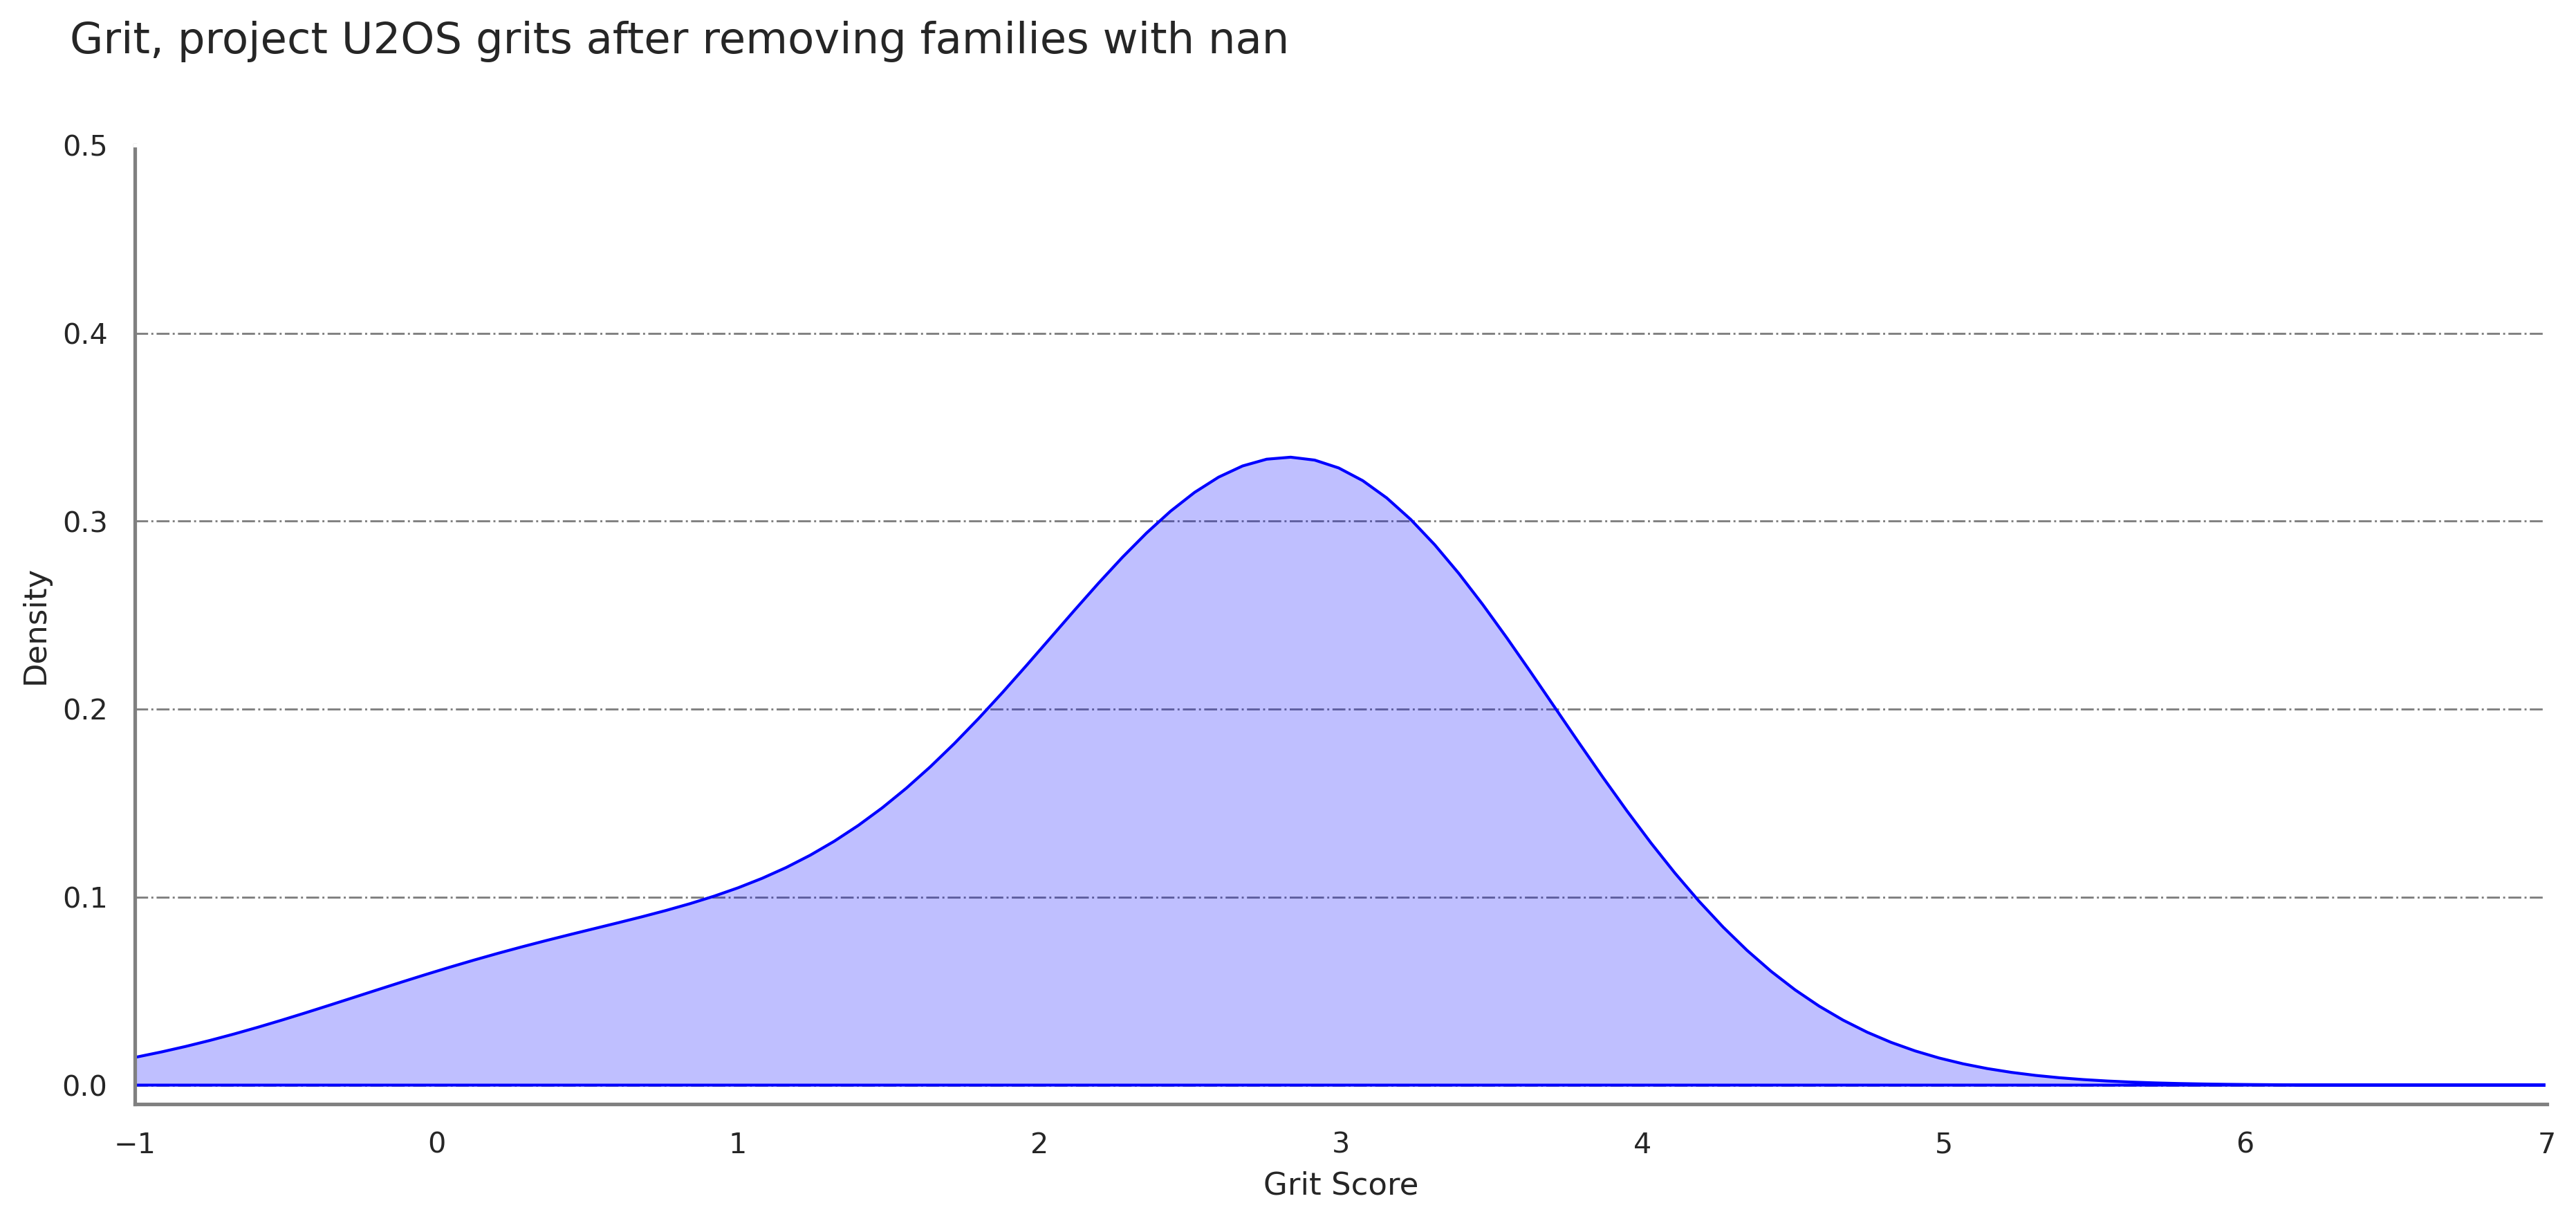

In [52]:
# visualize the grit scores with KDE plot

# Define your project name
project = 'U2OS grits after removing families with nan'

# Initialize the figure and set its size
fig = plt.figure(figsize=(15, 6))

# Set Seaborn style and font size
sns.set(font_scale=0.9)

# Add a super title for the figure
fig.suptitle(
    f'Grit, project {project}',
    fontsize=15,
    x=0.3
)

# Define subplot layout (1 row, 1 column)
ax = fig.add_subplot(1, 1, 1)

# Create a KDE plot for Grit scores
sns.kdeplot(
    data=grit_scores_grouped['grit'],  # Assuming 'grit' is the column with Grit scores
    fill=True,
    color="blue",
    bw_adjust=0.5,
    ax=ax
)

# Customize plot appearance
ax.set_facecolor('w')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.set_ylim([-0.01, 0.5])  # Set y-axis limits as per your data distribution
ax.set_xlim([-1, 7])  # Match the x-axis to expected range of grit scores
ax.yaxis.grid(which="major", color='grey', linestyle='-.', linewidth=0.7)
plt.axhline(y=1, color='r', linestyle='-.')  # Optional: if you want a reference line at y=1
ax.set_xlabel('Grit Score')
ax.set_ylabel('Density')

# Display the plot
plt.show()

In [53]:
df_grit_1


group       grit   compound   dose
23    Pam3CSK_NoIFN   1.045977    Pam3CSK  NoIFN
26   Poly(IC)_NoIFN   1.673285   Poly(IC)  NoIFN
5         CpG_NoIFN   1.980763        CpG  NoIFN
8   Flagellin_NoIFN   2.031893  Flagellin  NoIFN
19      Medium_IFNg   2.504986     Medium   IFNg
12         LPS_IFNb   2.586358        LPS   IFNb
14        LPS_NoIFN   2.594158        LPS  NoIFN
9     IL4+IL13_IFNb   2.659942   IL4+IL13   IFNb
1        CL264_IFNg   2.708027      CL264   IFNg
3          CpG_IFNb   2.749846        CpG   IFNb
10    IL4+IL13_IFNg   2.772732   IL4+IL13   IFNg
18      Medium_IFNb   2.859595     Medium   IFNb
0        CL264_IFNb   2.914212      CL264   IFNb
7    Flagellin_IFNg   2.946577  Flagellin   IFNg
6    Flagellin_IFNb   3.016119  Flagellin   IFNb
4          CpG_IFNg   3.102942        CpG   IFNg
13         LPS_IFNg   3.198795        LPS   IFNg
24    Poly(IC)_IFNb   3.201235   Poly(IC)   IFNb
25    Poly(IC)_IFNg   3.262862   Poly(IC)   IFNg
21     Pam3CSK_IFNb   3.393065    Pam3CSK   IFNb
22     Pam3CSK_IFNg   3.669816    Pam3CSK   IFNg
15         LTA_IFNb  10.603740        LTA   IFNb
17        LTA_NoIFN  11.224673        LTA  NoIFN
16         LTA_IFNg  11.324548        LTA   IFNg